In [2]:
#!pip install fedot

In [3]:
import os
os.environ["MKL_NUM_THREADS"] = "4"
os.environ["NUMEXPR_NUM_THREADS"] = "4"
os.environ["OMP_NUM_THREADS"] = "4"

import torch
torch.set_num_threads(4)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp'].drop('label',axis=1)['value'].to_numpy()

In [5]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans

In [6]:
horizon = 25
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 0
end = 1000
series = 6

if series == 'traffic':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None
    idx = np.array(range(len(np.array(ts))))

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)

    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
  
if series ==5:
    noise = 1
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=3,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='stable',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


2022-11-22 16:22:39,331 - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-11-22 16:22:39,674 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-11-22 16:22:39,680 - Creating converter from 5 to 7


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-11-22 16:22:39,684 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-11-22 16:22:39,687 - Creating converter from 5 to 7


DEBUG:root:Initializing MLIR with module: _site_initialize_0


2022-11-22 16:22:39,999 - Initializing MLIR with module: _site_initialize_0


DEBUG:root:Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.7/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


2022-11-22 16:22:40,006 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.7/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.


2022-11-22 16:22:40,117 - etils.epath found. Using etils.epath for file I/O.


INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


2022-11-22 16:22:41,223 - 'pattern' package not found; tag filters are not available for English


In [ ]:
inspect.getmembers(model)

[('__class__', fedot.api.main.Fedot),
 ('__delattr__',
  <method-wrapper '__delattr__' of Fedot object at 0x7f64b5cef150>),
 ('__dict__',
  {'metrics': <fedot.api.api_utils.metrics.ApiMetrics at 0x7f64b5c14910>,
   'api_composer': <fedot.api.api_utils.api_composer.ApiComposer at 0x7f64b5c14150>,
   'params': <fedot.api.api_utils.params.ApiParams at 0x7f64b5c14f10>,
   'data_processor': <fedot.api.api_utils.api_data.ApiDataProcessor at 0x7f64b8e25ad0>,
   'data_analyser': <fedot.api.api_utils.api_data_analyser.DataAnalyser at 0x7f64b5d3df50>,
   'target': None,
   'prediction': None,
   'train_data': None,
   'test_data': None,
   'current_pipeline': None,
   'best_models': (),
   'history': None}),
 ('__dir__', <function Fedot.__dir__()>),
 ('__doc__',
  "Main class for FEDOT API.\n\n    Facade for ApiDataProcessor, ApiComposer, ApiMetrics, ApiInitialAssumptions.\n\n    Args:\n        problem: the name of modelling problem to solve\n\n            .. details:: possible ``problem`` optio

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-11-22 16:22:46,017 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 16:22:46,027 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:22:46,031 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 16:22:46,037 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:22:46,043 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-11-22 16:22:46,052 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-11-22 16:22:46,173 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 16:22:46,306 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:22:46,315 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 16:22:46,322 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 16:22:46,326 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 16:22:46,332 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 16:22:46,339 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-11-22 16:22:46,348 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.3 sec.


2022-11-22 16:22:46,353 - ApiComposer - Initial pipeline was fitted in 0.3 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['lagged', 'glm', 'rfr', 'locf', 'isolation_forest_reg', 'adareg', 'ransac_lin_reg', 'sgdr', 'gaussian_filter', 'gbr', 'dtreg', 'normalization', 'ets', 'lgbmreg', 'linear', 'scaling', 'pca', 'ransac_non_lin_reg', 'treg', 'ridge', 'diff_filter', 'polyfit', 'lasso', 'smoothing', 'ar', 'clstm', 'cut', 'sparse_lagged', 'fast_ica', 'ts_naive_average', 'poly_features']


2022-11-22 16:22:46,383 - ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['lagged', 'glm', 'rfr', 'locf', 'isolation_forest_reg', 'adareg', 'ransac_lin_reg', 'sgdr', 'gaussian_filter', 'gbr', 'dtreg', 'normalization', 'ets', 'lgbmreg', 'linear', 'scaling', 'pca', 'ransac_non_lin_reg', 'treg', 'ridge', 'diff_filter', 'polyfit', 'lasso', 'smoothing', 'ar', 'clstm', 'cut', 'sparse_lagged', 'fast_ica', 'ts_naive_average', 'poly_features']


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-11-22 16:22:46,402 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-11-22 16:22:46,409 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 16:22:46,421 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-11-22 16:22:53,924 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5833390867213327, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 16:22:53,942 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5833390867213327, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 16:22:53,949 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.1 min


2022-11-22 16:22:53,961 - EvoGraphOptimizer - spent time: 0.1 min


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 16:22:55,113 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-11-22 16:23:44,062 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.48533900639977523, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 16:23:44,067 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.48533900639977523, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 16:23:44,070 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 1.0 min


2022-11-22 16:23:44,073 - EvoGraphOptimizer - spent time: 1.0 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-11-22 16:23:44,077 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 16:23:44,872 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-11-22 16:25:38,726 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.4792829415986337, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 16:25:38,733 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.4792829415986337, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 16:25:38,738 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 2.9 min


2022-11-22 16:25:38,741 - EvoGraphOptimizer - spent time: 2.9 min


CRITICAL:root:GroupedCondition - Optimisation stopped: Time limit is reached


2022-11-22 16:25:38,744 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:  33%|███▎      | 1/3 [02:52<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 2.872 min


2022-11-22 16:25:38,749 - OptimisationTimer - Composition time: 2.872 min


INFO:root:OptimisationTimer - Algorithm was terminated due to processing time limit


2022-11-22 16:25:38,752 - OptimisationTimer - Algorithm was terminated due to processing time limit


INFO:root:GPComposer - GP composition finished


2022-11-22 16:25:38,758 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-11-22 16:25:39,028 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-11-22 16:25:53,672 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [lgbmreg, glm, rfr, lagged]}


2022-11-22 16:25:53,681 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [lgbmreg, glm, rfr, lagged]}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: lgbmreg


2022-11-22 16:25:53,687 - SecondaryNode - Obtain prediction in secondary node with operation: lgbmreg


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: lgbmreg


2022-11-22 16:25:53,690 - SecondaryNode - Fit all parent nodes in secondary node with operation: lgbmreg


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: rfr


2022-11-22 16:25:53,693 - SecondaryNode - Obtain prediction in secondary node with operation: rfr


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: rfr


2022-11-22 16:25:53,696 - SecondaryNode - Fit all parent nodes in secondary node with operation: rfr


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 16:25:53,699 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 16:25:53,735 - PrimaryNode - Predict in primary node by operation: glm


2022-11-22 16:25:53,771 - OperationTypesRepository - Operation lagged not found in the repository


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.


2022-11-22 16:25:53,880 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:25:53,894 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:53,897 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


2022-11-22 16:25:53,904 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:25:53,909 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:53,915 - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:53,921 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:53,929 - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:25:53,936 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2022-11-22 16:25:53,940 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:53,944 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:53,951 - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:53,957 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:25:53,960 - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:53,966 - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:25:53,971 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:25:53,975 - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:53,980 - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:25:53,986 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:25:53,991 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:25:53,994 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2022-11-22 16:25:54,004 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,009 - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,013 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:25:54,019 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,022 - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,025 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:25:54,029 - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,032 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,036 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,039 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:25:54,042 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:25:54,045 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2022-11-22 16:25:54,048 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,056 - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


2022-11-22 16:25:54,059 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


2022-11-22 16:25:54,061 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,064 - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,067 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:25:54,069 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,072 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:25:54,075 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:25:54,078 - findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,080 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:25:54,083 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,086 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,092 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


2022-11-22 16:25:54,096 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,123 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:25:54,164 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:25:54,203 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:25:54,206 - findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


2022-11-22 16:25:54,209 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:25:54,211 - findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


2022-11-22 16:25:54,214 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


2022-11-22 16:25:54,217 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-11-22 16:25:54,220 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


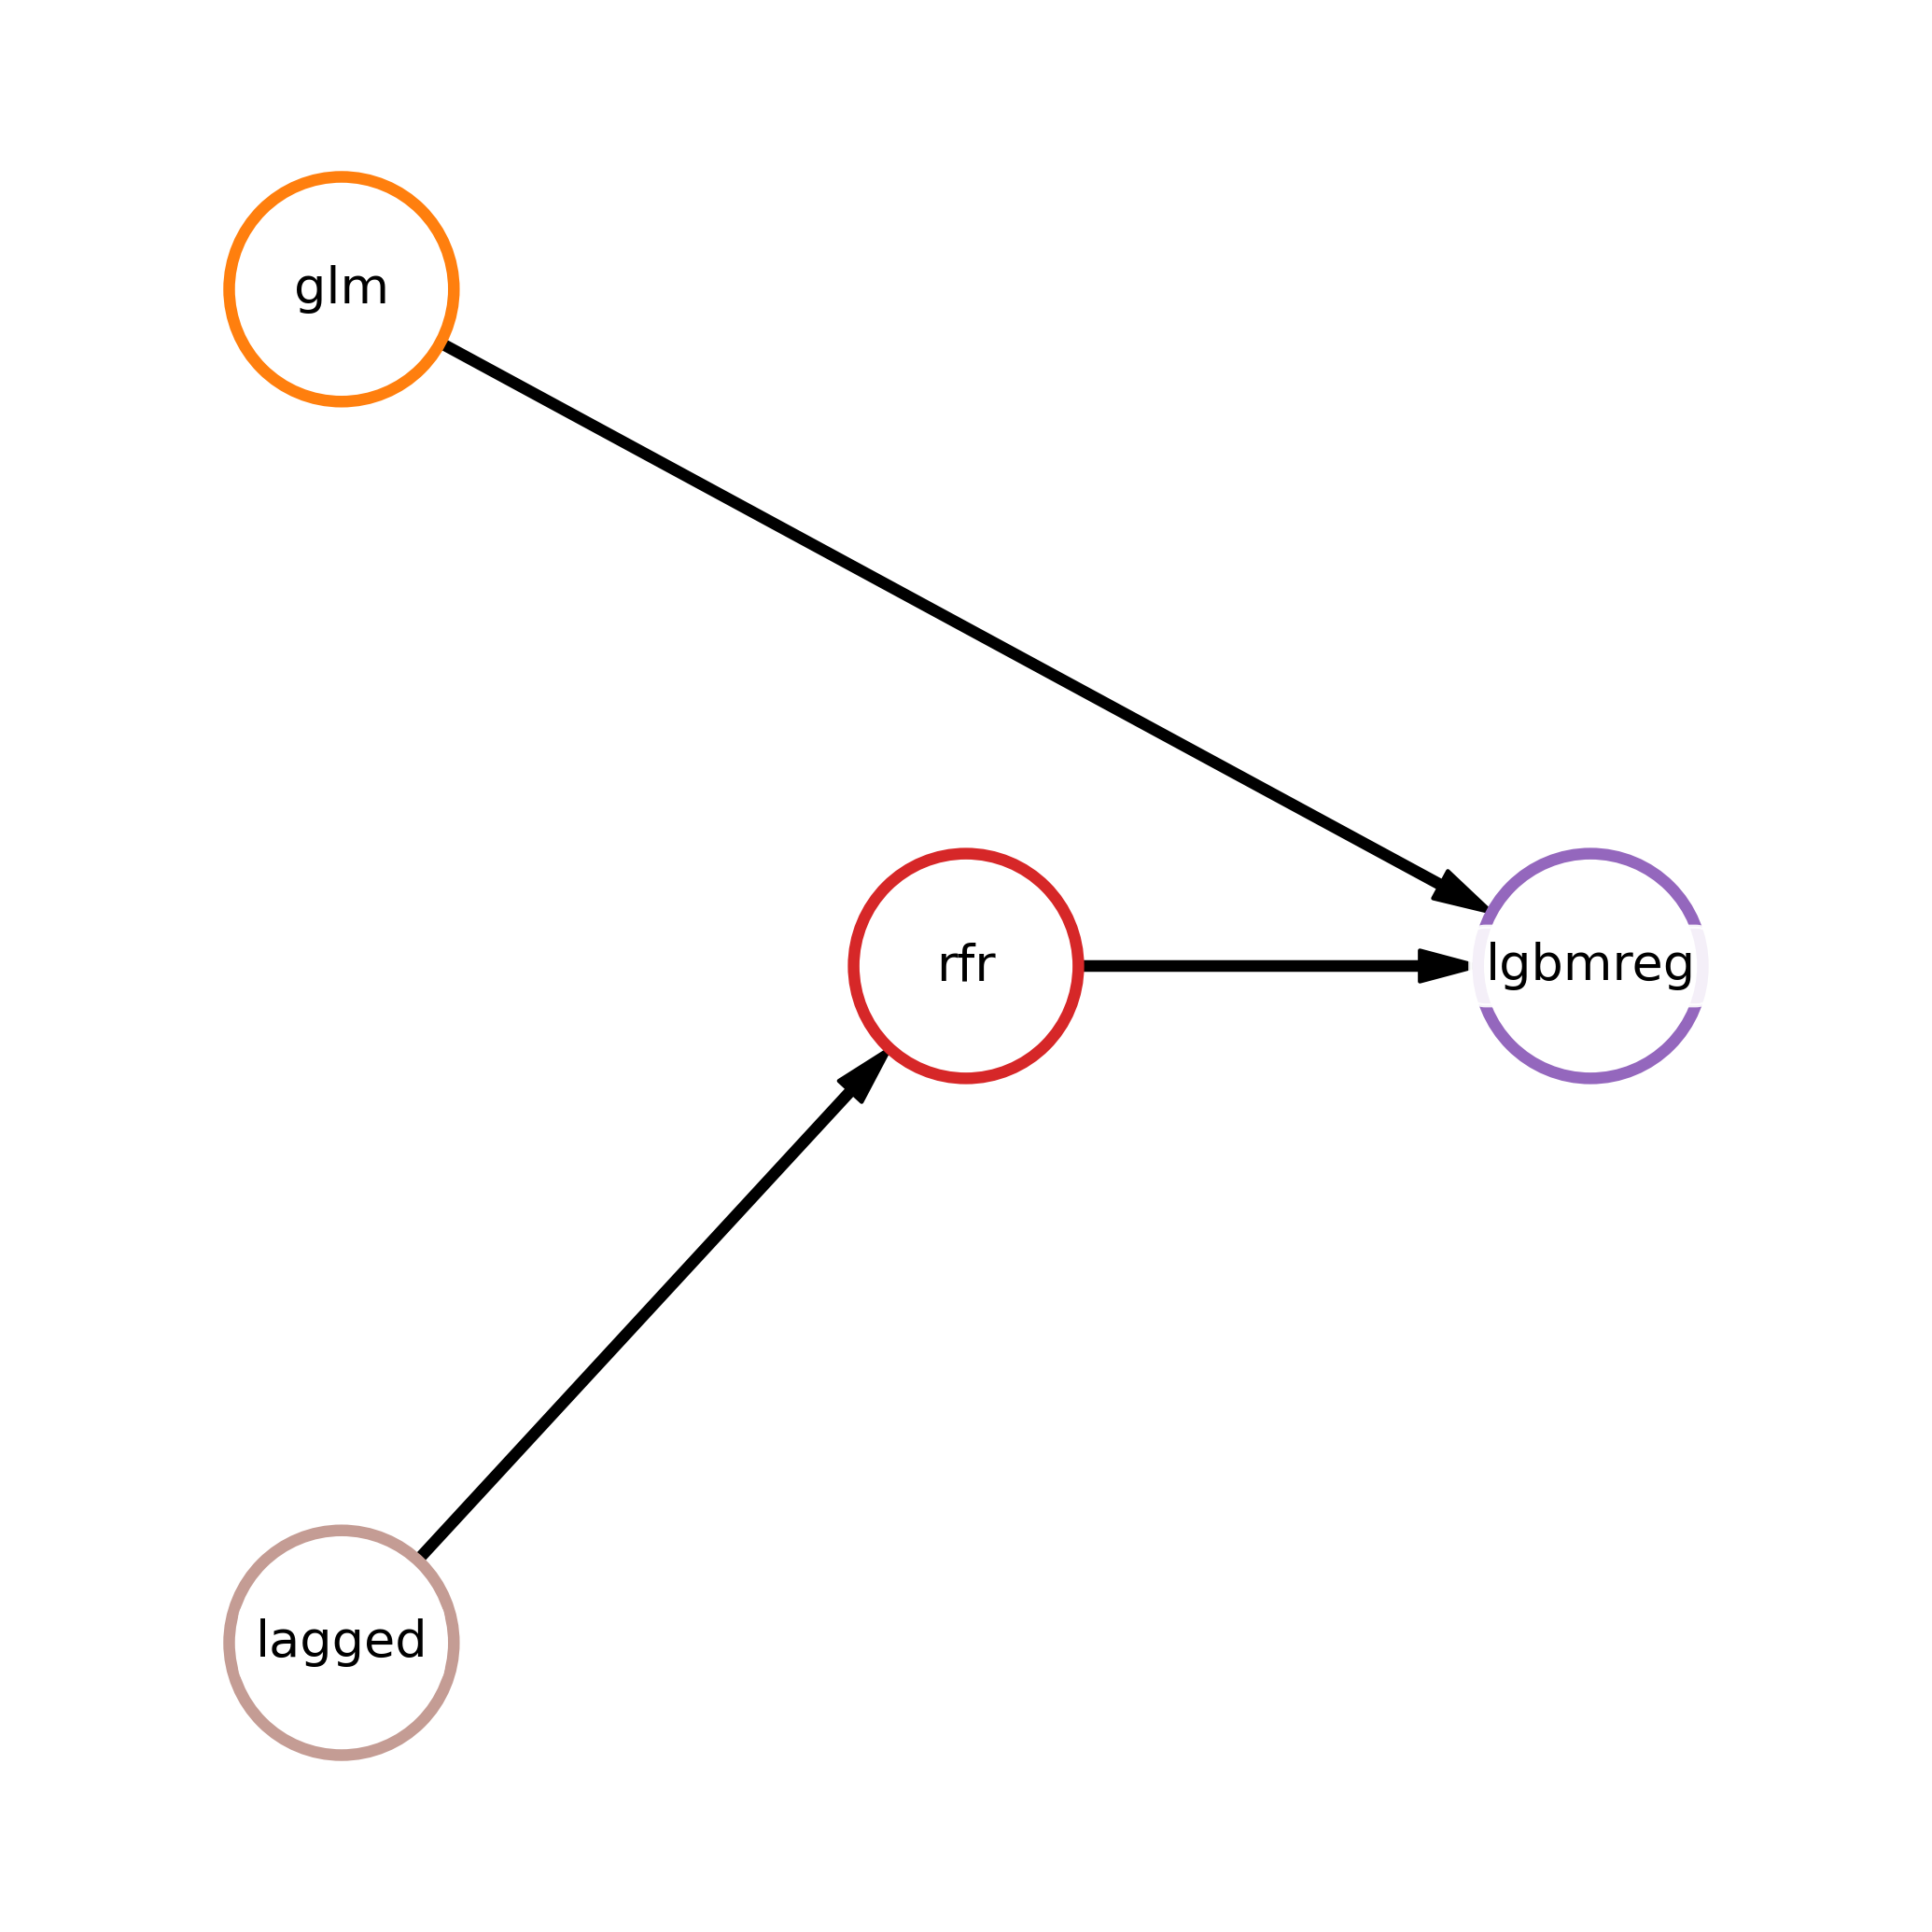

In [7]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)
pipeline.show()

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.


2022-11-22 16:26:11,948 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:26:11,956 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:11,962 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


2022-11-22 16:26:11,965 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:26:11,968 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:11,971 - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:11,974 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:11,978 - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:26:11,981 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2022-11-22 16:26:11,984 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:11,987 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:11,990 - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:11,993 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:26:11,996 - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:11,999 - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:26:12,002 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:26:12,005 - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,008 - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:26:12,012 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:26:12,015 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:26:12,018 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2022-11-22 16:26:12,021 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,024 - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,027 - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:26:12,030 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,033 - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,036 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:26:12,039 - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,043 - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,047 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,050 - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


2022-11-22 16:26:12,053 - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:26:12,056 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2022-11-22 16:26:12,059 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,062 - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


2022-11-22 16:26:12,065 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


2022-11-22 16:26:12,068 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,072 - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,075 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:26:12,078 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,081 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:26:12,084 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:26:12,087 - findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,090 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:26:12,093 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,096 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,100 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


2022-11-22 16:26:12,103 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,106 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


2022-11-22 16:26:12,109 - findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2022-11-22 16:26:12,112 - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


2022-11-22 16:26:12,116 - findfont: score(<Font 'Humor Sans' (Humor-Sans.ttf) normal normal 400 normal>) = 10.05


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


2022-11-22 16:26:12,119 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2022-11-22 16:26:12,122 - findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


2022-11-22 16:26:12,126 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25


DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


2022-11-22 16:26:12,129 - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-11-22 16:26:12,134 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


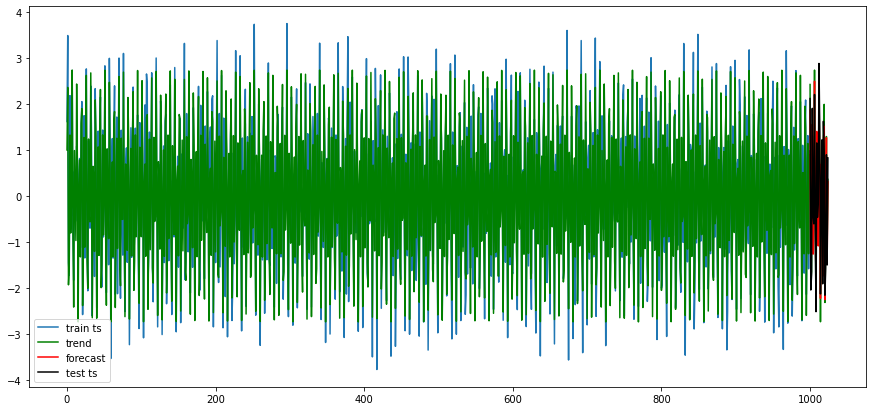

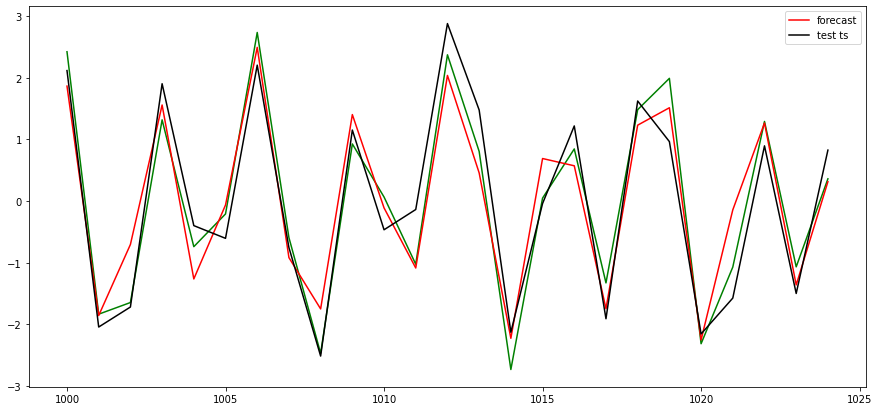

In [8]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [9]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [10]:
#importing for tuning
from fedot.core.optimisers.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 16:26:29,836 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 16:26:29,844 - DataSourceSplitter - Hold out validation is applied.


In [11]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [12]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-1]:
        fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))

    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [13]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

In [14]:
x = conf_int_maker(model = model, number_models =7,pipelines_show = False)

INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №1
2022-11-22 16:26:41,236 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009593 seconds


2022-11-22 16:26:42,133 - build_posterior_wrapper took 0.009593 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:26:42,148 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:16,  1.88s/trial, best loss: 0.24155421754448153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007830 seconds


2022-11-22 16:26:44,010 - build_posterior_wrapper took 0.007830 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.241554


2022-11-22 16:26:44,017 - TPE using 1/1 trials with best loss 0.241554
 20%|██        | 2/10 [00:04<00:16,  2.08s/trial, best loss: 0.23211200161131118]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007753 seconds


2022-11-22 16:26:46,224 - build_posterior_wrapper took 0.007753 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.232112


2022-11-22 16:26:46,233 - TPE using 2/2 trials with best loss 0.232112
 30%|███       | 3/10 [00:06<00:14,  2.12s/trial, best loss: 0.21127287345731371]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007930 seconds


2022-11-22 16:26:48,394 - build_posterior_wrapper took 0.007930 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.211273


2022-11-22 16:26:48,400 - TPE using 3/3 trials with best loss 0.211273
 40%|████      | 4/10 [00:06<00:09,  1.51s/trial, best loss: 0.21127287345731371]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008152 seconds


2022-11-22 16:26:48,972 - build_posterior_wrapper took 0.008152 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.211273


2022-11-22 16:26:48,977 - TPE using 4/4 trials with best loss 0.211273
 50%|█████     | 5/10 [00:08<00:07,  1.53s/trial, best loss: 0.21127287345731371]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007926 seconds


2022-11-22 16:26:50,531 - build_posterior_wrapper took 0.007926 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.211273


2022-11-22 16:26:50,537 - TPE using 5/5 trials with best loss 0.211273
 60%|██████    | 6/10 [00:08<00:04,  1.19s/trial, best loss: 0.21127287345731371]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007801 seconds


2022-11-22 16:26:51,065 - build_posterior_wrapper took 0.007801 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.211273


2022-11-22 16:26:51,076 - TPE using 6/6 trials with best loss 0.211273
 70%|███████   | 7/10 [00:09<00:03,  1.12s/trial, best loss: 0.21127287345731371]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008964 seconds


2022-11-22 16:26:52,049 - build_posterior_wrapper took 0.008964 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.211273


2022-11-22 16:26:52,060 - TPE using 7/7 trials with best loss 0.211273
 80%|████████  | 8/10 [00:10<00:02,  1.06s/trial, best loss: 0.21127287345731371]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008064 seconds


2022-11-22 16:26:52,982 - build_posterior_wrapper took 0.008064 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.211273


2022-11-22 16:26:52,993 - TPE using 8/8 trials with best loss 0.211273
 90%|█████████ | 9/10 [00:12<00:01,  1.21s/trial, best loss: 0.21127287345731371]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007651 seconds


2022-11-22 16:26:54,519 - build_posterior_wrapper took 0.007651 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.211273


2022-11-22 16:26:54,527 - TPE using 9/9 trials with best loss 0.211273
100%|██████████| 10/10 [00:13<00:00,  1.38s/trial, best loss: 0.21127287345731371]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:26:58,216 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.211 equal or better than initial (+ 5% deviation) 0.235


2022-11-22 16:26:58,228 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.211 equal or better than initial (+ 5% deviation) 0.235


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:26:59,349 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010741 seconds


2022-11-22 16:27:01,906 - build_posterior_wrapper took 0.010741 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:27:01,917 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:26,  2.95s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011579 seconds


2022-11-22 16:27:04,866 - build_posterior_wrapper took 0.011579 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.163485


2022-11-22 16:27:04,879 - TPE using 1/1 trials with best loss 0.163485
 20%|██        | 2/10 [00:04<00:15,  1.91s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009250 seconds


2022-11-22 16:27:06,045 - build_posterior_wrapper took 0.009250 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.163485


2022-11-22 16:27:06,053 - TPE using 2/2 trials with best loss 0.163485
 30%|███       | 3/10 [00:05<00:13,  1.88s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013990 seconds


2022-11-22 16:27:07,884 - build_posterior_wrapper took 0.013990 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.163485


2022-11-22 16:27:07,891 - TPE using 3/3 trials with best loss 0.163485
 40%|████      | 4/10 [00:06<00:08,  1.42s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008030 seconds


2022-11-22 16:27:08,585 - build_posterior_wrapper took 0.008030 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.163485


2022-11-22 16:27:08,592 - TPE using 4/4 trials with best loss 0.163485
 50%|█████     | 5/10 [00:07<00:05,  1.15s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008257 seconds


2022-11-22 16:27:09,272 - build_posterior_wrapper took 0.008257 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.163485


2022-11-22 16:27:09,279 - TPE using 5/5 trials with best loss 0.163485
 60%|██████    | 6/10 [00:08<00:05,  1.25s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009468 seconds


2022-11-22 16:27:10,724 - build_posterior_wrapper took 0.009468 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.163485


2022-11-22 16:27:10,730 - TPE using 6/6 trials with best loss 0.163485
 70%|███████   | 7/10 [00:10<00:04,  1.38s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009584 seconds


2022-11-22 16:27:12,378 - build_posterior_wrapper took 0.009584 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.163485


2022-11-22 16:27:12,384 - TPE using 7/7 trials with best loss 0.163485
 80%|████████  | 8/10 [00:11<00:02,  1.38s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011930 seconds


2022-11-22 16:27:13,752 - build_posterior_wrapper took 0.011930 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.163485


2022-11-22 16:27:13,766 - TPE using 8/8 trials with best loss 0.163485
 90%|█████████ | 9/10 [00:13<00:01,  1.41s/trial, best loss: 0.16348474444735905]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008564 seconds


2022-11-22 16:27:15,219 - build_posterior_wrapper took 0.008564 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.163485


2022-11-22 16:27:15,231 - TPE using 9/9 trials with best loss 0.163485
100%|██████████| 10/10 [00:14<00:00,  1.49s/trial, best loss: 0.16348474444735905]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:27:19,499 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.163 equal or better than initial (+ 5% deviation) 0.171


2022-11-22 16:27:19,507 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.163 equal or better than initial (+ 5% deviation) 0.171


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №2
2022-11-22 16:27:20,763 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007831 seconds


2022-11-22 16:27:34,423 - build_posterior_wrapper took 0.007831 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:27:34,428 - TPE using 0 trials
 10%|█         | 1/10 [00:11<01:47, 11.95s/trial, best loss: 0.2415967376891524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011077 seconds


2022-11-22 16:27:46,378 - build_posterior_wrapper took 0.011077 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.241597


2022-11-22 16:27:46,385 - TPE using 1/1 trials with best loss 0.241597
 20%|██        | 2/10 [00:24<01:36, 12.03s/trial, best loss: 0.2415967376891524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012355 seconds


2022-11-22 16:27:58,465 - build_posterior_wrapper took 0.012355 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.241597


2022-11-22 16:27:58,475 - TPE using 2/2 trials with best loss 0.241597
 30%|███       | 3/10 [00:37<01:29, 12.78s/trial, best loss: 0.2415967376891524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009118 seconds


2022-11-22 16:28:12,125 - build_posterior_wrapper took 0.009118 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.241597


2022-11-22 16:28:12,132 - TPE using 3/3 trials with best loss 0.241597
 40%|████      | 4/10 [00:47<01:09, 11.57s/trial, best loss: 0.23878533375769131]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006302 seconds


2022-11-22 16:28:21,845 - build_posterior_wrapper took 0.006302 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.238785


2022-11-22 16:28:21,851 - TPE using 4/4 trials with best loss 0.238785
 50%|█████     | 5/10 [00:59<00:59, 11.82s/trial, best loss: 0.23878533375769131]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012599 seconds


2022-11-22 16:28:34,099 - build_posterior_wrapper took 0.012599 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.238785


2022-11-22 16:28:34,108 - TPE using 5/5 trials with best loss 0.238785
 60%|██████    | 6/10 [01:16<00:53, 13.49s/trial, best loss: 0.23878533375769131]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008876 seconds


2022-11-22 16:28:50,848 - build_posterior_wrapper took 0.008876 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.238785


2022-11-22 16:28:50,853 - TPE using 6/6 trials with best loss 0.238785
 70%|███████   | 7/10 [01:32<00:42, 14.32s/trial, best loss: 0.23878533375769131]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010196 seconds


2022-11-22 16:29:06,874 - build_posterior_wrapper took 0.010196 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.238785


2022-11-22 16:29:06,881 - TPE using 7/7 trials with best loss 0.238785
 80%|████████  | 8/10 [01:44<00:27, 13.53s/trial, best loss: 0.2053474330337943] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009566 seconds


2022-11-22 16:29:18,712 - build_posterior_wrapper took 0.009566 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.205347


2022-11-22 16:29:18,718 - TPE using 8/8 trials with best loss 0.205347
 90%|█████████ | 9/10 [01:55<00:12, 12.89s/trial, best loss: 0.2053474330337943]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009511 seconds


2022-11-22 16:29:30,201 - build_posterior_wrapper took 0.009511 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.205347


2022-11-22 16:29:30,207 - TPE using 9/9 trials with best loss 0.205347
100%|██████████| 10/10 [02:00<00:00, 12.08s/trial, best loss: 0.2053474330337943]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:29:47,287 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.205 equal or better than initial (+ 5% deviation) 0.233


2022-11-22 16:29:47,296 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.205 equal or better than initial (+ 5% deviation) 0.233


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:29:48,128 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008421 seconds


2022-11-22 16:30:01,967 - build_posterior_wrapper took 0.008421 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:30:01,972 - TPE using 0 trials
 10%|█         | 1/10 [00:07<01:07,  7.45s/trial, best loss: 0.19525422911873405]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011599 seconds


2022-11-22 16:30:09,420 - build_posterior_wrapper took 0.011599 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.195254


2022-11-22 16:30:09,428 - TPE using 1/1 trials with best loss 0.195254
 20%|██        | 2/10 [00:15<01:02,  7.84s/trial, best loss: 0.1540591025161272] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007780 seconds


2022-11-22 16:30:17,531 - build_posterior_wrapper took 0.007780 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.154059


2022-11-22 16:30:17,541 - TPE using 2/2 trials with best loss 0.154059
 30%|███       | 3/10 [00:21<00:50,  7.17s/trial, best loss: 0.1540591025161272]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011697 seconds


2022-11-22 16:30:23,912 - build_posterior_wrapper took 0.011697 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.154059


2022-11-22 16:30:23,916 - TPE using 3/3 trials with best loss 0.154059
 40%|████      | 4/10 [00:36<01:00, 10.13s/trial, best loss: 0.1540591025161272]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009846 seconds


2022-11-22 16:30:38,579 - build_posterior_wrapper took 0.009846 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.154059


2022-11-22 16:30:38,586 - TPE using 4/4 trials with best loss 0.154059
 50%|█████     | 5/10 [00:42<00:42,  8.54s/trial, best loss: 0.1540591025161272]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006677 seconds


2022-11-22 16:30:44,284 - build_posterior_wrapper took 0.006677 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.154059


2022-11-22 16:30:44,291 - TPE using 5/5 trials with best loss 0.154059
 60%|██████    | 6/10 [00:57<00:43, 10.84s/trial, best loss: 0.1540591025161272]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009715 seconds


2022-11-22 16:30:59,600 - build_posterior_wrapper took 0.009715 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.154059


2022-11-22 16:30:59,607 - TPE using 6/6 trials with best loss 0.154059
 70%|███████   | 7/10 [01:20<00:44, 14.89s/trial, best loss: 0.1540591025161272]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010637 seconds


2022-11-22 16:31:22,814 - build_posterior_wrapper took 0.010637 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.154059


2022-11-22 16:31:22,822 - TPE using 7/7 trials with best loss 0.154059
 80%|████████  | 8/10 [01:35<00:29, 14.66s/trial, best loss: 0.1540591025161272]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009878 seconds


2022-11-22 16:31:36,984 - build_posterior_wrapper took 0.009878 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.154059


2022-11-22 16:31:36,991 - TPE using 8/8 trials with best loss 0.154059
 90%|█████████ | 9/10 [01:49<00:14, 14.49s/trial, best loss: 0.1540591025161272]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008537 seconds


2022-11-22 16:31:51,120 - build_posterior_wrapper took 0.008537 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.154059


2022-11-22 16:31:51,125 - TPE using 9/9 trials with best loss 0.154059
100%|██████████| 10/10 [02:03<00:00, 12.34s/trial, best loss: 0.1540591025161272]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:32:13,067 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.154 equal or better than initial (+ 5% deviation) 0.169


2022-11-22 16:32:13,076 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.154 equal or better than initial (+ 5% deviation) 0.169


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №3
2022-11-22 16:32:13,759 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010913 seconds


2022-11-22 16:32:14,592 - build_posterior_wrapper took 0.010913 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:32:14,598 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.37trial/s, best loss: 0.25301032195382495]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009781 seconds


2022-11-22 16:32:15,324 - build_posterior_wrapper took 0.009781 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.253010


2022-11-22 16:32:15,331 - TPE using 1/1 trials with best loss 0.253010
 20%|██        | 2/10 [00:02<00:09,  1.20s/trial, best loss: 0.22401406103966462]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008923 seconds


2022-11-22 16:32:16,853 - build_posterior_wrapper took 0.008923 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.224014


2022-11-22 16:32:16,859 - TPE using 2/2 trials with best loss 0.224014
 30%|███       | 3/10 [00:03<00:08,  1.28s/trial, best loss: 0.21841040612920853]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008051 seconds


2022-11-22 16:32:18,235 - build_posterior_wrapper took 0.008051 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.218410


2022-11-22 16:32:18,251 - TPE using 3/3 trials with best loss 0.218410
 40%|████      | 4/10 [00:04<00:06,  1.10s/trial, best loss: 0.21841040612920853]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015393 seconds


2022-11-22 16:32:19,055 - build_posterior_wrapper took 0.015393 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.218410


2022-11-22 16:32:19,068 - TPE using 4/4 trials with best loss 0.218410
 50%|█████     | 5/10 [00:05<00:06,  1.25s/trial, best loss: 0.21841040612920853]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007979 seconds


2022-11-22 16:32:20,573 - build_posterior_wrapper took 0.007979 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.218410


2022-11-22 16:32:20,587 - TPE using 5/5 trials with best loss 0.218410
 60%|██████    | 6/10 [00:06<00:04,  1.14s/trial, best loss: 0.21841040612920853]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008089 seconds


2022-11-22 16:32:21,494 - build_posterior_wrapper took 0.008089 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.218410


2022-11-22 16:32:21,509 - TPE using 6/6 trials with best loss 0.218410
 70%|███████   | 7/10 [00:08<00:04,  1.40s/trial, best loss: 0.21835028871469275]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011207 seconds


2022-11-22 16:32:23,437 - build_posterior_wrapper took 0.011207 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.218350


2022-11-22 16:32:23,447 - TPE using 7/7 trials with best loss 0.218350
 80%|████████  | 8/10 [00:11<00:03,  1.65s/trial, best loss: 0.21835028871469275]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019487 seconds


2022-11-22 16:32:25,643 - build_posterior_wrapper took 0.019487 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.218350


2022-11-22 16:32:25,651 - TPE using 8/8 trials with best loss 0.218350
 90%|█████████ | 9/10 [00:12<00:01,  1.51s/trial, best loss: 0.21835028871469275]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011090 seconds


2022-11-22 16:32:26,816 - build_posterior_wrapper took 0.011090 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.218350


2022-11-22 16:32:26,825 - TPE using 9/9 trials with best loss 0.218350
100%|██████████| 10/10 [00:14<00:00,  1.42s/trial, best loss: 0.21835028871469275]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:32:30,740 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.218 equal or better than initial (+ 5% deviation) 0.235


2022-11-22 16:32:30,746 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.218 equal or better than initial (+ 5% deviation) 0.235


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:32:31,907 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009113 seconds


2022-11-22 16:32:33,891 - build_posterior_wrapper took 0.009113 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:32:33,897 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:08,  1.11trial/s, best loss: 0.17879680064590522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011513 seconds


2022-11-22 16:32:34,795 - build_posterior_wrapper took 0.011513 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.178797


2022-11-22 16:32:34,801 - TPE using 1/1 trials with best loss 0.178797
 20%|██        | 2/10 [00:01<00:05,  1.43trial/s, best loss: 0.17879680064590522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017645 seconds


2022-11-22 16:32:35,366 - build_posterior_wrapper took 0.017645 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.178797


2022-11-22 16:32:35,378 - TPE using 2/2 trials with best loss 0.178797
 30%|███       | 3/10 [00:02<00:06,  1.06trial/s, best loss: 0.17583431542789882]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010146 seconds


2022-11-22 16:32:36,591 - build_posterior_wrapper took 0.010146 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.175834


2022-11-22 16:32:36,598 - TPE using 3/3 trials with best loss 0.175834
 40%|████      | 4/10 [00:03<00:05,  1.14trial/s, best loss: 0.17583431542789882]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010121 seconds


2022-11-22 16:32:37,362 - build_posterior_wrapper took 0.010121 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.175834


2022-11-22 16:32:37,375 - TPE using 4/4 trials with best loss 0.175834
 50%|█████     | 5/10 [00:04<00:04,  1.22trial/s, best loss: 0.17583431542789882]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008473 seconds


2022-11-22 16:32:38,087 - build_posterior_wrapper took 0.008473 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.175834


2022-11-22 16:32:38,101 - TPE using 5/5 trials with best loss 0.175834
 60%|██████    | 6/10 [00:05<00:03,  1.12trial/s, best loss: 0.17583431542789882]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008166 seconds


2022-11-22 16:32:39,124 - build_posterior_wrapper took 0.008166 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.175834


2022-11-22 16:32:39,136 - TPE using 6/6 trials with best loss 0.175834
 70%|███████   | 7/10 [00:06<00:02,  1.06trial/s, best loss: 0.16405818478930992]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008456 seconds


2022-11-22 16:32:40,176 - build_posterior_wrapper took 0.008456 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.164058


2022-11-22 16:32:40,185 - TPE using 7/7 trials with best loss 0.164058
 80%|████████  | 8/10 [00:07<00:01,  1.04trial/s, best loss: 0.16405818478930992]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008847 seconds


2022-11-22 16:32:41,171 - build_posterior_wrapper took 0.008847 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.164058


2022-11-22 16:32:41,189 - TPE using 8/8 trials with best loss 0.164058
 90%|█████████ | 9/10 [00:09<00:01,  1.39s/trial, best loss: 0.16405818478930992]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014191 seconds


2022-11-22 16:32:43,510 - build_posterior_wrapper took 0.014191 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.164058


2022-11-22 16:32:43,522 - TPE using 9/9 trials with best loss 0.164058
100%|██████████| 10/10 [00:11<00:00,  1.10s/trial, best loss: 0.16405818478930992]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:32:46,602 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.164 equal or better than initial (+ 5% deviation) 0.176


2022-11-22 16:32:46,606 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.164 equal or better than initial (+ 5% deviation) 0.176


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №4
2022-11-22 16:32:47,275 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007997 seconds


2022-11-22 16:32:51,752 - build_posterior_wrapper took 0.007997 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:32:51,755 - TPE using 0 trials
 10%|█         | 1/10 [00:06<00:58,  6.48s/trial, best loss: 0.2761370848052291]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007595 seconds


2022-11-22 16:32:58,234 - build_posterior_wrapper took 0.007595 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.276137


2022-11-22 16:32:58,240 - TPE using 1/1 trials with best loss 0.276137
 20%|██        | 2/10 [00:32<02:25, 18.13s/trial, best loss: 0.2761370848052291]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009853 seconds


2022-11-22 16:33:24,516 - build_posterior_wrapper took 0.009853 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.276137


2022-11-22 16:33:24,524 - TPE using 2/2 trials with best loss 0.276137
 30%|███       | 3/10 [00:44<01:47, 15.36s/trial, best loss: 0.25660805347181115]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004546 seconds


2022-11-22 16:33:36,574 - build_posterior_wrapper took 0.004546 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.256608


2022-11-22 16:33:36,584 - TPE using 3/3 trials with best loss 0.256608
 40%|████      | 4/10 [01:23<02:26, 24.48s/trial, best loss: 0.24366685756694295]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010437 seconds


2022-11-22 16:34:15,033 - build_posterior_wrapper took 0.010437 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.243667


2022-11-22 16:34:15,038 - TPE using 4/4 trials with best loss 0.243667
 50%|█████     | 5/10 [01:43<01:54, 22.95s/trial, best loss: 0.24366685756694295]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010297 seconds


2022-11-22 16:34:35,291 - build_posterior_wrapper took 0.010297 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.243667


2022-11-22 16:34:35,295 - TPE using 5/5 trials with best loss 0.243667
 60%|██████    | 6/10 [02:50<01:53, 28.45s/trial, best loss: 0.24366685756694295]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:36:19,657 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.249 equal or better than initial (+ 5% deviation) 0.266


2022-11-22 16:36:19,667 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.249 equal or better than initial (+ 5% deviation) 0.266


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:36:22,968 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009750 seconds


2022-11-22 16:37:01,319 - build_posterior_wrapper took 0.009750 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:37:01,328 - TPE using 0 trials
 10%|█         | 1/10 [01:05<09:47, 65.23s/trial, best loss: 0.20366471254076404]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006138 seconds


2022-11-22 16:38:06,549 - build_posterior_wrapper took 0.006138 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.203665


2022-11-22 16:38:06,559 - TPE using 1/1 trials with best loss 0.203665
 20%|██        | 2/10 [01:36<06:03, 45.38s/trial, best loss: 0.20366471254076404]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010894 seconds


2022-11-22 16:38:38,032 - build_posterior_wrapper took 0.010894 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.203665


2022-11-22 16:38:38,038 - TPE using 2/2 trials with best loss 0.203665
 30%|███       | 3/10 [02:01<04:44, 40.66s/trial, best loss: 0.20366471254076404]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:40:11,219 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 0.209 worse than initial (+ 5% deviation) 0.185


2022-11-22 16:40:11,227 - PipelineTuner - Return init pipeline due to the fact that obtained metric 0.209 worse than initial (+ 5% deviation) 0.185


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №5
2022-11-22 16:40:16,320 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.546380 seconds


2022-11-22 16:40:22,608 - build_posterior_wrapper took 0.546380 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:40:22,630 - TPE using 0 trials
 10%|█         | 1/10 [00:04<00:44,  4.90s/trial, best loss: 0.2258381820229089]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012049 seconds


2022-11-22 16:40:26,978 - build_posterior_wrapper took 0.012049 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.225838


2022-11-22 16:40:26,984 - TPE using 1/1 trials with best loss 0.225838
 20%|██        | 2/10 [00:07<00:26,  3.32s/trial, best loss: 0.2165913701969844]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007645 seconds


2022-11-22 16:40:29,190 - build_posterior_wrapper took 0.007645 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.216591


2022-11-22 16:40:29,199 - TPE using 2/2 trials with best loss 0.216591
 30%|███       | 3/10 [00:11<00:27,  3.92s/trial, best loss: 0.21026361747911199]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008597 seconds


2022-11-22 16:40:33,828 - build_posterior_wrapper took 0.008597 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.210264


2022-11-22 16:40:33,834 - TPE using 3/3 trials with best loss 0.210264
 40%|████      | 4/10 [00:13<00:19,  3.19s/trial, best loss: 0.21026361747911199]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006750 seconds


2022-11-22 16:40:35,894 - build_posterior_wrapper took 0.006750 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.210264


2022-11-22 16:40:35,907 - TPE using 4/4 trials with best loss 0.210264
 50%|█████     | 5/10 [00:15<00:12,  2.59s/trial, best loss: 0.20094509011751893]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011672 seconds


2022-11-22 16:40:37,431 - build_posterior_wrapper took 0.011672 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.200945


2022-11-22 16:40:37,436 - TPE using 5/5 trials with best loss 0.200945
 60%|██████    | 6/10 [00:19<00:12,  3.15s/trial, best loss: 0.20094509011751893]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010263 seconds


2022-11-22 16:40:41,651 - build_posterior_wrapper took 0.010263 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.200945


2022-11-22 16:40:41,664 - TPE using 6/6 trials with best loss 0.200945
 70%|███████   | 7/10 [00:25<00:12,  4.07s/trial, best loss: 0.20094509011751893]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010995 seconds


2022-11-22 16:40:47,612 - build_posterior_wrapper took 0.010995 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.200945


2022-11-22 16:40:47,623 - TPE using 7/7 trials with best loss 0.200945
 80%|████████  | 8/10 [00:28<00:07,  3.62s/trial, best loss: 0.20094509011751893]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010204 seconds


2022-11-22 16:40:50,268 - build_posterior_wrapper took 0.010204 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.200945


2022-11-22 16:40:50,279 - TPE using 8/8 trials with best loss 0.200945
 90%|█████████ | 9/10 [00:34<00:04,  4.37s/trial, best loss: 0.20094509011751893]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009016 seconds


2022-11-22 16:40:56,280 - build_posterior_wrapper took 0.009016 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.200945


2022-11-22 16:40:56,291 - TPE using 9/9 trials with best loss 0.200945
100%|██████████| 10/10 [00:37<00:00,  3.74s/trial, best loss: 0.20094509011751893]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:41:01,077 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.201 equal or better than initial (+ 5% deviation) 0.247


2022-11-22 16:41:01,088 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.201 equal or better than initial (+ 5% deviation) 0.247


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:41:02,229 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011050 seconds


2022-11-22 16:41:03,855 - build_posterior_wrapper took 0.011050 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:41:03,861 - TPE using 0 trials
 10%|█         | 1/10 [00:06<01:02,  6.95s/trial, best loss: 0.2644393102029359]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019056 seconds


2022-11-22 16:41:10,815 - build_posterior_wrapper took 0.019056 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.264439


2022-11-22 16:41:10,825 - TPE using 1/1 trials with best loss 0.264439
 20%|██        | 2/10 [00:10<00:40,  5.07s/trial, best loss: 0.17479417938955405]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010410 seconds


2022-11-22 16:41:14,552 - build_posterior_wrapper took 0.010410 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.174794


2022-11-22 16:41:14,558 - TPE using 2/2 trials with best loss 0.174794
 30%|███       | 3/10 [00:13<00:29,  4.26s/trial, best loss: 0.16762017378392435]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010561 seconds


2022-11-22 16:41:17,849 - build_posterior_wrapper took 0.010561 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.167620


2022-11-22 16:41:17,854 - TPE using 3/3 trials with best loss 0.167620
 40%|████      | 4/10 [00:17<00:24,  4.04s/trial, best loss: 0.16762017378392435]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011148 seconds


2022-11-22 16:41:21,568 - build_posterior_wrapper took 0.011148 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.167620


2022-11-22 16:41:21,581 - TPE using 4/4 trials with best loss 0.167620
 50%|█████     | 5/10 [00:21<00:19,  3.91s/trial, best loss: 0.16762017378392435]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011631 seconds


2022-11-22 16:41:25,231 - build_posterior_wrapper took 0.011631 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.167620


2022-11-22 16:41:25,237 - TPE using 5/5 trials with best loss 0.167620
 60%|██████    | 6/10 [00:24<00:14,  3.50s/trial, best loss: 0.16067766527993033]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008953 seconds


2022-11-22 16:41:27,945 - build_posterior_wrapper took 0.008953 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.160678


2022-11-22 16:41:27,955 - TPE using 6/6 trials with best loss 0.160678
 70%|███████   | 7/10 [00:26<00:09,  3.13s/trial, best loss: 0.16067766527993033]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014161 seconds


2022-11-22 16:41:30,310 - build_posterior_wrapper took 0.014161 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.160678


2022-11-22 16:41:30,317 - TPE using 7/7 trials with best loss 0.160678
 80%|████████  | 8/10 [00:30<00:06,  3.34s/trial, best loss: 0.16067766527993033]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011319 seconds


2022-11-22 16:41:34,111 - build_posterior_wrapper took 0.011319 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.160678


2022-11-22 16:41:34,116 - TPE using 8/8 trials with best loss 0.160678
 90%|█████████ | 9/10 [00:32<00:03,  3.12s/trial, best loss: 0.16067766527993033]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011923 seconds


2022-11-22 16:41:36,735 - build_posterior_wrapper took 0.011923 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.160678


2022-11-22 16:41:36,741 - TPE using 9/9 trials with best loss 0.160678
100%|██████████| 10/10 [00:35<00:00,  3.58s/trial, best loss: 0.16067766527993033]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:41:42,567 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.161 equal or better than initial (+ 5% deviation) 0.165


2022-11-22 16:41:42,574 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.161 equal or better than initial (+ 5% deviation) 0.165


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №6
2022-11-22 16:41:44,819 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013320 seconds


2022-11-22 16:41:45,687 - build_posterior_wrapper took 0.013320 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:41:45,693 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:15,  1.76s/trial, best loss: 0.23473078610728554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012298 seconds


2022-11-22 16:41:47,455 - build_posterior_wrapper took 0.012298 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.234731


2022-11-22 16:41:47,468 - TPE using 1/1 trials with best loss 0.234731
 20%|██        | 2/10 [00:03<00:12,  1.57s/trial, best loss: 0.2327841776766072] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011209 seconds


2022-11-22 16:41:48,895 - build_posterior_wrapper took 0.011209 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.232784


2022-11-22 16:41:48,912 - TPE using 2/2 trials with best loss 0.232784
 30%|███       | 3/10 [00:04<00:10,  1.46s/trial, best loss: 0.2265876571467198]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008090 seconds


2022-11-22 16:41:50,226 - build_posterior_wrapper took 0.008090 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.226588


2022-11-22 16:41:50,235 - TPE using 3/3 trials with best loss 0.226588
 40%|████      | 4/10 [00:05<00:06,  1.07s/trial, best loss: 0.2265876571467198]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012275 seconds


2022-11-22 16:41:50,698 - build_posterior_wrapper took 0.012275 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.226588


2022-11-22 16:41:50,711 - TPE using 4/4 trials with best loss 0.226588
 50%|█████     | 5/10 [00:06<00:06,  1.31s/trial, best loss: 0.22209180844928988]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008180 seconds


2022-11-22 16:41:52,415 - build_posterior_wrapper took 0.008180 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.222092


2022-11-22 16:41:52,431 - TPE using 5/5 trials with best loss 0.222092
 60%|██████    | 6/10 [00:08<00:06,  1.63s/trial, best loss: 0.22209180844928988]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016290 seconds


2022-11-22 16:41:54,676 - build_posterior_wrapper took 0.016290 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.222092


2022-11-22 16:41:54,683 - TPE using 6/6 trials with best loss 0.222092
 70%|███████   | 7/10 [00:10<00:04,  1.55s/trial, best loss: 0.22209180844928988]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009243 seconds


2022-11-22 16:41:56,047 - build_posterior_wrapper took 0.009243 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.222092


2022-11-22 16:41:56,056 - TPE using 7/7 trials with best loss 0.222092
 80%|████████  | 8/10 [00:10<00:02,  1.23s/trial, best loss: 0.22209180844928988]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008239 seconds


2022-11-22 16:41:56,609 - build_posterior_wrapper took 0.008239 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.222092


2022-11-22 16:41:56,619 - TPE using 8/8 trials with best loss 0.222092
 90%|█████████ | 9/10 [00:12<00:01,  1.49s/trial, best loss: 0.22209180844928988]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008614 seconds


2022-11-22 16:41:58,664 - build_posterior_wrapper took 0.008614 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.222092


2022-11-22 16:41:58,670 - TPE using 9/9 trials with best loss 0.222092
100%|██████████| 10/10 [00:13<00:00,  1.36s/trial, best loss: 0.22209180844928988]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:42:00,679 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.222 equal or better than initial (+ 5% deviation) 0.235


2022-11-22 16:42:00,685 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.222 equal or better than initial (+ 5% deviation) 0.235


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:42:01,819 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007689 seconds


2022-11-22 16:42:03,300 - build_posterior_wrapper took 0.007689 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:42:03,310 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:17,  1.95s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011032 seconds


2022-11-22 16:42:05,260 - build_posterior_wrapper took 0.011032 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.167988


2022-11-22 16:42:05,273 - TPE using 1/1 trials with best loss 0.167988
 20%|██        | 2/10 [00:04<00:18,  2.37s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013266 seconds


2022-11-22 16:42:07,923 - build_posterior_wrapper took 0.013266 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.167988


2022-11-22 16:42:07,940 - TPE using 2/2 trials with best loss 0.167988
 30%|███       | 3/10 [00:06<00:14,  2.02s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.022562 seconds


2022-11-22 16:42:09,541 - build_posterior_wrapper took 0.022562 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.167988


2022-11-22 16:42:09,552 - TPE using 3/3 trials with best loss 0.167988
 40%|████      | 4/10 [00:07<00:10,  1.78s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011788 seconds


2022-11-22 16:42:10,937 - build_posterior_wrapper took 0.011788 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.167988


2022-11-22 16:42:10,947 - TPE using 4/4 trials with best loss 0.167988
 50%|█████     | 5/10 [00:08<00:07,  1.54s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008330 seconds


2022-11-22 16:42:12,034 - build_posterior_wrapper took 0.008330 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.167988


2022-11-22 16:42:12,044 - TPE using 5/5 trials with best loss 0.167988
 60%|██████    | 6/10 [00:09<00:04,  1.16s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008030 seconds


2022-11-22 16:42:12,471 - build_posterior_wrapper took 0.008030 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.167988


2022-11-22 16:42:12,482 - TPE using 6/6 trials with best loss 0.167988
 70%|███████   | 7/10 [00:10<00:03,  1.24s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008100 seconds


2022-11-22 16:42:13,870 - build_posterior_wrapper took 0.008100 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.167988


2022-11-22 16:42:13,885 - TPE using 7/7 trials with best loss 0.167988
 80%|████████  | 8/10 [00:11<00:02,  1.04s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009086 seconds


2022-11-22 16:42:14,475 - build_posterior_wrapper took 0.009086 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.167988


2022-11-22 16:42:14,486 - TPE using 8/8 trials with best loss 0.167988
 90%|█████████ | 9/10 [00:12<00:01,  1.25s/trial, best loss: 0.16798783509752746]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013070 seconds


2022-11-22 16:42:16,186 - build_posterior_wrapper took 0.013070 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.167988


2022-11-22 16:42:16,197 - TPE using 9/9 trials with best loss 0.167988
100%|██████████| 10/10 [00:13<00:00,  1.34s/trial, best loss: 0.16798783509752746]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:42:18,640 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.168 equal or better than initial (+ 5% deviation) 0.176


2022-11-22 16:42:18,653 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.168 equal or better than initial (+ 5% deviation) 0.176


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №7
2022-11-22 16:42:19,204 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008513 seconds


2022-11-22 16:42:21,462 - build_posterior_wrapper took 0.008513 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:42:21,467 - TPE using 0 trials
 10%|█         | 1/10 [00:03<00:28,  3.14s/trial, best loss: 0.3739401368201014]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011311 seconds


2022-11-22 16:42:24,604 - build_posterior_wrapper took 0.011311 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.373940


2022-11-22 16:42:24,610 - TPE using 1/1 trials with best loss 0.373940
 20%|██        | 2/10 [00:06<00:24,  3.03s/trial, best loss: 0.2245521536505732]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013053 seconds


2022-11-22 16:42:27,557 - build_posterior_wrapper took 0.013053 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.224552


2022-11-22 16:42:27,567 - TPE using 2/2 trials with best loss 0.224552
 30%|███       | 3/10 [00:16<00:44,  6.39s/trial, best loss: 0.2245521536505732]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012470 seconds


2022-11-22 16:42:37,952 - build_posterior_wrapper took 0.012470 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.224552


2022-11-22 16:42:37,961 - TPE using 3/3 trials with best loss 0.224552
 40%|████      | 4/10 [00:23<00:38,  6.45s/trial, best loss: 0.2062518386515817]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011870 seconds


2022-11-22 16:42:44,497 - build_posterior_wrapper took 0.011870 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.206252


2022-11-22 16:42:44,505 - TPE using 4/4 trials with best loss 0.206252
 50%|█████     | 5/10 [00:27<00:28,  5.77s/trial, best loss: 0.2062518386515817]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008152 seconds


2022-11-22 16:42:49,046 - build_posterior_wrapper took 0.008152 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.206252


2022-11-22 16:42:49,053 - TPE using 5/5 trials with best loss 0.206252
 60%|██████    | 6/10 [00:28<00:17,  4.27s/trial, best loss: 0.2062518386515817]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011709 seconds


2022-11-22 16:42:50,401 - build_posterior_wrapper took 0.011709 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.206252


2022-11-22 16:42:50,414 - TPE using 6/6 trials with best loss 0.206252
 70%|███████   | 7/10 [00:34<00:14,  4.78s/trial, best loss: 0.2062518386515817]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010400 seconds


2022-11-22 16:42:56,244 - build_posterior_wrapper took 0.010400 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.206252


2022-11-22 16:42:56,254 - TPE using 7/7 trials with best loss 0.206252
 80%|████████  | 8/10 [00:37<00:08,  4.04s/trial, best loss: 0.2062518386515817]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010232 seconds


2022-11-22 16:42:58,714 - build_posterior_wrapper took 0.010232 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.206252


2022-11-22 16:42:58,720 - TPE using 8/8 trials with best loss 0.206252
 90%|█████████ | 9/10 [00:43<00:04,  4.75s/trial, best loss: 0.2062518386515817]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019165 seconds


2022-11-22 16:43:05,035 - build_posterior_wrapper took 0.019165 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.206252


2022-11-22 16:43:05,046 - TPE using 9/9 trials with best loss 0.206252
100%|██████████| 10/10 [00:52<00:00,  5.25s/trial, best loss: 0.2062518386515817]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:43:20,473 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.206 equal or better than initial (+ 5% deviation) 0.237


2022-11-22 16:43:20,487 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.206 equal or better than initial (+ 5% deviation) 0.237


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:43:25,037 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010970 seconds


2022-11-22 16:43:34,822 - build_posterior_wrapper took 0.010970 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:43:34,829 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:15,  1.76s/trial, best loss: 0.18993858551321316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013289 seconds


2022-11-22 16:43:36,587 - build_posterior_wrapper took 0.013289 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.189939


2022-11-22 16:43:36,594 - TPE using 1/1 trials with best loss 0.189939
 20%|██        | 2/10 [00:08<00:38,  4.85s/trial, best loss: 0.16997159232934897]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010999 seconds


2022-11-22 16:43:43,591 - build_posterior_wrapper took 0.010999 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.169972


2022-11-22 16:43:43,596 - TPE using 2/2 trials with best loss 0.169972
 30%|███       | 3/10 [00:14<00:36,  5.19s/trial, best loss: 0.15822945095113555]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017576 seconds


2022-11-22 16:43:49,188 - build_posterior_wrapper took 0.017576 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.158229


2022-11-22 16:43:49,195 - TPE using 3/3 trials with best loss 0.158229
 40%|████      | 4/10 [00:27<00:49,  8.27s/trial, best loss: 0.14845264199790792]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012985 seconds


2022-11-22 16:44:02,173 - build_posterior_wrapper took 0.012985 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.148453


2022-11-22 16:44:02,179 - TPE using 4/4 trials with best loss 0.148453
 50%|█████     | 5/10 [00:41<00:51, 10.23s/trial, best loss: 0.14845264199790792]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011006 seconds


2022-11-22 16:44:15,887 - build_posterior_wrapper took 0.011006 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.148453


2022-11-22 16:44:15,893 - TPE using 5/5 trials with best loss 0.148453
 60%|██████    | 6/10 [00:45<00:33,  8.28s/trial, best loss: 0.14845264199790792]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010578 seconds


2022-11-22 16:44:20,363 - build_posterior_wrapper took 0.010578 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.148453


2022-11-22 16:44:20,369 - TPE using 6/6 trials with best loss 0.148453
 70%|███████   | 7/10 [00:59<00:29,  9.98s/trial, best loss: 0.14845264199790792]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012866 seconds


2022-11-22 16:44:33,861 - build_posterior_wrapper took 0.012866 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.148453


2022-11-22 16:44:33,866 - TPE using 7/7 trials with best loss 0.148453
 80%|████████  | 8/10 [01:03<00:16,  8.12s/trial, best loss: 0.14845264199790792]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014065 seconds


2022-11-22 16:44:38,004 - build_posterior_wrapper took 0.014065 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.148453


2022-11-22 16:44:38,010 - TPE using 8/8 trials with best loss 0.148453
 90%|█████████ | 9/10 [01:05<00:06,  6.22s/trial, best loss: 0.14845264199790792]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014021 seconds


2022-11-22 16:44:40,033 - build_posterior_wrapper took 0.014021 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.148453


2022-11-22 16:44:40,040 - TPE using 9/9 trials with best loss 0.148453
100%|██████████| 10/10 [01:11<00:00,  7.17s/trial, best loss: 0.14845264199790792]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:44:57,339 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.148 equal or better than initial (+ 5% deviation) 0.165


2022-11-22 16:44:57,351 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.148 equal or better than initial (+ 5% deviation) 0.165


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №8
2022-11-22 16:45:05,819 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011779 seconds


2022-11-22 16:45:09,043 - build_posterior_wrapper took 0.011779 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:45:09,052 - TPE using 0 trials
 10%|█         | 1/10 [00:10<01:31, 10.19s/trial, best loss: 0.24569669073274927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010025 seconds


2022-11-22 16:45:19,230 - build_posterior_wrapper took 0.010025 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.245697


2022-11-22 16:45:19,236 - TPE using 1/1 trials with best loss 0.245697
 20%|██        | 2/10 [00:20<01:20, 10.04s/trial, best loss: 0.22872227289337338]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005311 seconds


2022-11-22 16:45:29,165 - build_posterior_wrapper took 0.005311 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.228722


2022-11-22 16:45:29,172 - TPE using 2/2 trials with best loss 0.228722
 30%|███       | 3/10 [00:33<01:21, 11.58s/trial, best loss: 0.22872227289337338]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008645 seconds


2022-11-22 16:45:42,581 - build_posterior_wrapper took 0.008645 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.228722


2022-11-22 16:45:42,585 - TPE using 3/3 trials with best loss 0.228722
 40%|████      | 4/10 [01:26<02:47, 27.96s/trial, best loss: 0.22872227289337338]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005926 seconds


2022-11-22 16:46:35,654 - build_posterior_wrapper took 0.005926 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.228722


2022-11-22 16:46:35,662 - TPE using 4/4 trials with best loss 0.228722
 50%|█████     | 5/10 [02:03<02:03, 24.66s/trial, best loss: 0.22872227289337338]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:47:21,926 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.229 equal or better than initial (+ 5% deviation) 0.261


2022-11-22 16:47:21,935 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.229 equal or better than initial (+ 5% deviation) 0.261


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:47:22,863 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004307 seconds


2022-11-22 16:47:32,605 - build_posterior_wrapper took 0.004307 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:47:32,611 - TPE using 0 trials
 10%|█         | 1/10 [00:05<00:53,  5.92s/trial, best loss: 0.250618521244353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009908 seconds


2022-11-22 16:47:38,531 - build_posterior_wrapper took 0.009908 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.250619


2022-11-22 16:47:38,540 - TPE using 1/1 trials with best loss 0.250619
 20%|██        | 2/10 [00:43<03:15, 24.40s/trial, best loss: 0.21913145578048968]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009662 seconds


2022-11-22 16:48:15,868 - build_posterior_wrapper took 0.009662 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.219131


2022-11-22 16:48:15,875 - TPE using 2/2 trials with best loss 0.219131
 30%|███       | 3/10 [00:57<02:18, 19.79s/trial, best loss: 0.20497480957571096]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009587 seconds


2022-11-22 16:48:30,167 - build_posterior_wrapper took 0.009587 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.204975


2022-11-22 16:48:30,174 - TPE using 3/3 trials with best loss 0.204975
 40%|████      | 4/10 [01:14<01:52, 18.74s/trial, best loss: 0.20437865601904318]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009206 seconds


2022-11-22 16:48:47,295 - build_posterior_wrapper took 0.009206 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.204379


2022-11-22 16:48:47,301 - TPE using 4/4 trials with best loss 0.204379
 50%|█████     | 5/10 [01:22<01:13, 14.73s/trial, best loss: 0.20437865601904318]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009116 seconds


2022-11-22 16:48:54,935 - build_posterior_wrapper took 0.009116 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.204379


2022-11-22 16:48:54,942 - TPE using 5/5 trials with best loss 0.204379
 60%|██████    | 6/10 [01:46<01:12, 18.05s/trial, best loss: 0.1748455984065407] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011153 seconds


2022-11-22 16:49:19,426 - build_posterior_wrapper took 0.011153 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.174846


2022-11-22 16:49:19,433 - TPE using 6/6 trials with best loss 0.174846
 70%|███████   | 7/10 [02:13<00:57, 19.13s/trial, best loss: 0.1748455984065407]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:50:10,026 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.169 equal or better than initial (+ 5% deviation) 0.190


2022-11-22 16:50:10,032 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.169 equal or better than initial (+ 5% deviation) 0.190


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №9
2022-11-22 16:50:11,425 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.020426 seconds


2022-11-22 16:50:12,684 - build_posterior_wrapper took 0.020426 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:50:12,691 - TPE using 0 trials
 10%|█         | 1/10 [00:04<00:42,  4.67s/trial, best loss: 0.23058067870472773]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011905 seconds


2022-11-22 16:50:17,345 - build_posterior_wrapper took 0.011905 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.230581


2022-11-22 16:50:17,353 - TPE using 1/1 trials with best loss 0.230581
 20%|██        | 2/10 [00:08<00:31,  3.95s/trial, best loss: 0.23058067870472773]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.023760 seconds


2022-11-22 16:50:20,802 - build_posterior_wrapper took 0.023760 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.230581


2022-11-22 16:50:20,814 - TPE using 2/2 trials with best loss 0.230581
 30%|███       | 3/10 [00:10<00:21,  3.11s/trial, best loss: 0.22623863226432037]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010594 seconds


2022-11-22 16:50:22,898 - build_posterior_wrapper took 0.010594 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.226239


2022-11-22 16:50:22,905 - TPE using 3/3 trials with best loss 0.226239
 40%|████      | 4/10 [00:12<00:16,  2.67s/trial, best loss: 0.22623863226432037]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008355 seconds


2022-11-22 16:50:24,887 - build_posterior_wrapper took 0.008355 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.226239


2022-11-22 16:50:24,897 - TPE using 4/4 trials with best loss 0.226239
 50%|█████     | 5/10 [00:15<00:14,  2.81s/trial, best loss: 0.22623863226432037]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008514 seconds


2022-11-22 16:50:27,954 - build_posterior_wrapper took 0.008514 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.226239


2022-11-22 16:50:27,967 - TPE using 5/5 trials with best loss 0.226239
 60%|██████    | 6/10 [00:20<00:14,  3.73s/trial, best loss: 0.22623863226432037]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.427667 seconds


2022-11-22 16:50:33,899 - build_posterior_wrapper took 0.427667 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.226239


2022-11-22 16:50:33,909 - TPE using 6/6 trials with best loss 0.226239
 70%|███████   | 7/10 [00:28<00:15,  5.15s/trial, best loss: 0.21916057030188618]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015728 seconds


2022-11-22 16:50:41,572 - build_posterior_wrapper took 0.015728 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.219161


2022-11-22 16:50:41,589 - TPE using 7/7 trials with best loss 0.219161
 80%|████████  | 8/10 [00:32<00:09,  4.52s/trial, best loss: 0.21916057030188618]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016196 seconds


2022-11-22 16:50:44,720 - build_posterior_wrapper took 0.016196 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.219161


2022-11-22 16:50:44,732 - TPE using 8/8 trials with best loss 0.219161
 90%|█████████ | 9/10 [00:35<00:04,  4.29s/trial, best loss: 0.21916057030188618]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011298 seconds


2022-11-22 16:50:48,491 - build_posterior_wrapper took 0.011298 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.219161


2022-11-22 16:50:48,497 - TPE using 9/9 trials with best loss 0.219161
100%|██████████| 10/10 [00:39<00:00,  3.97s/trial, best loss: 0.21916057030188618]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:50:59,258 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.219 equal or better than initial (+ 5% deviation) 0.235


2022-11-22 16:50:59,273 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.219 equal or better than initial (+ 5% deviation) 0.235


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 16:51:00,560 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008896 seconds


2022-11-22 16:51:07,348 - build_posterior_wrapper took 0.008896 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 16:51:07,354 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:21,  2.34s/trial, best loss: 0.1782418330624001]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007979 seconds


2022-11-22 16:51:09,694 - build_posterior_wrapper took 0.007979 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.178242


2022-11-22 16:51:09,704 - TPE using 1/1 trials with best loss 0.178242
 20%|██        | 2/10 [00:08<00:35,  4.44s/trial, best loss: 0.17205861757423288]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014887 seconds


2022-11-22 16:51:15,619 - build_posterior_wrapper took 0.014887 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.172059


2022-11-22 16:51:15,632 - TPE using 2/2 trials with best loss 0.172059
 30%|███       | 3/10 [00:14<00:37,  5.33s/trial, best loss: 0.16797589861597625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008489 seconds


2022-11-22 16:51:21,989 - build_posterior_wrapper took 0.008489 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.167976


2022-11-22 16:51:22,005 - TPE using 3/3 trials with best loss 0.167976
 40%|████      | 4/10 [00:22<00:37,  6.24s/trial, best loss: 0.16797589861597625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014739 seconds


2022-11-22 16:51:29,625 - build_posterior_wrapper took 0.014739 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.167976


2022-11-22 16:51:29,631 - TPE using 4/4 trials with best loss 0.167976
 50%|█████     | 5/10 [00:28<00:30,  6.10s/trial, best loss: 0.16797589861597625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007932 seconds


2022-11-22 16:51:35,483 - build_posterior_wrapper took 0.007932 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.167976


2022-11-22 16:51:35,491 - TPE using 5/5 trials with best loss 0.167976
 60%|██████    | 6/10 [00:34<00:24,  6.12s/trial, best loss: 0.16555019533675722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009471 seconds


2022-11-22 16:51:41,624 - build_posterior_wrapper took 0.009471 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.165550


2022-11-22 16:51:41,631 - TPE using 6/6 trials with best loss 0.165550
 70%|███████   | 7/10 [00:39<00:17,  5.77s/trial, best loss: 0.16555019533675722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015949 seconds


2022-11-22 16:51:46,707 - build_posterior_wrapper took 0.015949 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.165550


2022-11-22 16:51:46,721 - TPE using 7/7 trials with best loss 0.165550
 80%|████████  | 8/10 [00:40<00:08,  4.38s/trial, best loss: 0.16555019533675722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008240 seconds


2022-11-22 16:51:48,088 - build_posterior_wrapper took 0.008240 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.165550


2022-11-22 16:51:48,095 - TPE using 8/8 trials with best loss 0.165550
 90%|█████████ | 9/10 [00:44<00:04,  4.21s/trial, best loss: 0.16555019533675722]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009116 seconds


2022-11-22 16:51:51,942 - build_posterior_wrapper took 0.009116 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.165550


2022-11-22 16:51:51,949 - TPE using 9/9 trials with best loss 0.165550
100%|██████████| 10/10 [00:53<00:00,  5.30s/trial, best loss: 0.16555019533675722]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 16:52:06,428 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.166 equal or better than initial (+ 5% deviation) 0.179


2022-11-22 16:52:06,435 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.166 equal or better than initial (+ 5% deviation) 0.179


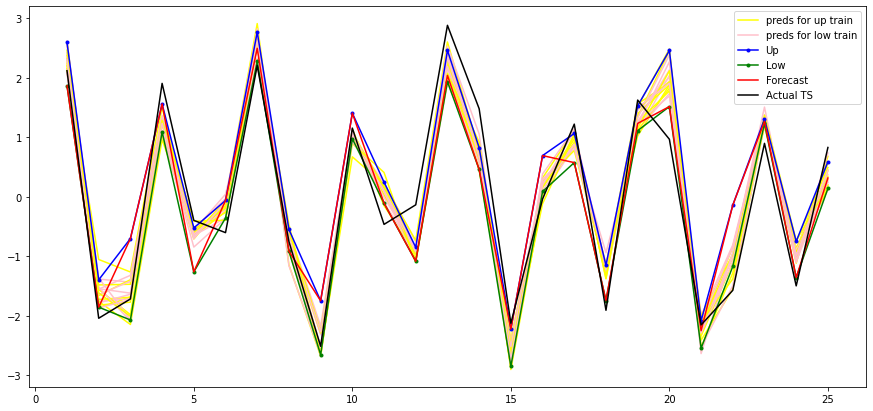

In [15]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = False,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = False,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)